In [78]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from math import sqrt
from scipy import stats
from pandas import Series, DataFrame, read_html

import urllib, json
from urllib.request import urlopen
from random import gauss, seed, randint
from datetime import datetime as dt
from pandas import Series, DataFrame, read_html
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
Oil_Price = pd.read_csv('BrentPrice.csv')
#source = IEA
Oil_Price.head()

,Day,Dollars per Barrel
0,06/7/2021,70.89
1,06/4/2021,71.30
2,06/3/2021,70.71
3,06/2/2021,70.60
4,06/1/2021,70.03


<AxesSubplot:>

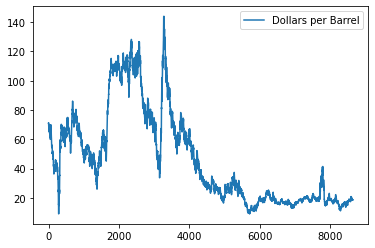

In [102]:
Oil_Price.plot()

In [103]:
Data = pd.read_excel('Production_Oil.xlsx')
# source = http://developpement-durable.bsocom.fr/Statistiques/TableViewer/tableView.aspx?ReportId=13137
Data.tail()

,Période,1. Production de pétrole (brut et hydrocarbures extraits du gaz naturel en kt),1.1 Production de pétrole brut (en kt),1.2 Production d'hydrocarbures extraits du gaz naturel (en kt),2. Solde importateur (importations - exportations) tous produits pétroliers (en kt),2.1 Importations totales de produits pétroliers (en kt),2.1.1 Importations de pétrole brut et condensats (en kt),2.1.2 Importations d'autres produits à distiller (APD) (en kt),2.1.3 Importations de produits pétroliers raffinés (en kt),2.2 Exportations de produits pétroliers raffinés (en kt),...,5.5 Ventes de gazole non routier (en kt),5.5 Ventes de carburéacteur (en kt),5.6 Ventes de gaz de pétrole liquéfiés (GPL) (en kt),5.7 Ventes de produits à usage non énergétique (en kt),"6. Consommation primaire de produits pétroliers, hors autoconsommation des raffineries corrigée du climat (en kt)",6.1 Ventes totales de fioul lourd (FOL) corrigées du climat (en kt),6.1.1 Ventes de fioul lourd (FOL) à l'industrie corrigées du climat (en kt),6.2 Ventes de fioul domestique (FOD) corrigées du climat (en kt),6.3 Ventes de gaz de pétrole liquéfiés (GPL) corrigées du climat (en kt),7. Indice de rigueur climatique pour la France métropolitaine (ref.1 pour la période 1986-2015) (sans unité)
479,2020-12-01,56.585,56.585,0.0,4299.74106,5376.478415,1855.93,0,3520.548415,1076.737355,...,260.5,266.50,184.4,877.741332,5327.33832,16.021517,10.721517,818.0032304,184.6715374,0.901712
480,2021-01-01,57.910,57.910,0.0,6170.773344,6922.30854,2385.018,0,4537.29054,751.535196,...,237.4,286.40,190.7,818.948507,5277.945175,14.161065,8.861065,985.2007092,199.4631719,1.039198
481,2021-02-01,51.677,51.677,0.0,5116.243625,5983.624098,2214.629,0,3768.995098,867.3804730000001,...,268.1,234.60,177.9,818.052405,5059.400725,13.905108,10.905108,941.2148404,183.222323,0.815429
482,2021-03-01,56.551,56.551,0.0,5111.278003,6158.494351,2770.378,0,3388.116351,1047.216348,...,403.2,165.10,170.1,826.680945,5458.451535,14.428259,9.128259,870.7418326,162.3444847,1.019648
483,2021-04-01,55.392,55.392,0.0,-,-,-,-,-,-,...,400.3505,233.52,138.0,722.907857,4876.677219,13.576706,8.276706,759.8675958,135.9807868,1.278883


In [87]:
Oil_Data = Data[['Période','1.1 Production de pétrole brut (en kt)','4. Consommation totale de produits pétroliers, hors autoconsommation des raffineries  (en kt)']]
Oil_Data = Oil_Data.rename(columns={'Période':'Date'})
Oil_Data = Oil_Data.rename(columns={'1.1 Production de pétrole brut (en kt)':'Production'})
Oil_Data = Oil_Data.rename(columns={'4. Consommation totale de produits pétroliers, hors autoconsommation des raffineries  (en kt)':'Consommation'})
Oil_Data.DATE = pd.to_datetime(Oil_Data.Date, format='%Y%m%d')
Oil_Data.head()

<ipython-input-87-25d101837d8a>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Oil_Data.DATE = pd.to_datetime(Oil_Data.Date, format='%Y%m%d')


,Date,Production,Consommation
0,1981-01-01,134.5,9781.2
1,1981-02-01,125.6,8336.4
2,1981-03-01,144.2,7602.1
3,1981-04-01,139.4,6159.7
4,1981-05-01,140.0,7088.5


In [88]:
Oil_Price = Oil_Price.rename(columns={'Day':'Date'})
#Oil_Price['Date'] = Oil_Price['Date']. astype(str)
Oil_Price['Date'] = pd.to_datetime(Oil_Price['Date'], infer_datetime_format=True)
Oil_Price.Date = pd.to_datetime(Oil_Price.Date, format='%Y%m%d')
Oil_Price.head()

,Date,Dollars per Barrel
0,2021-06-07,70.89
1,2021-06-04,71.30
2,2021-06-03,70.71
3,2021-06-02,70.60
4,2021-06-01,70.03


In [89]:
Oil_Price['Day'] = Oil_Price['Date'].dt.strftime('%d')
Oil_Price = Oil_Price[Oil_Price.Day.eq('01')]
Oil_Price.head()

,Date,Dollars per Barrel,Day
4,2021-06-01,70.03,01
45,2021-04-01,63.85,01
68,2021-03-01,64.56,01
88,2021-02-01,56.42,01
130,2020-12-01,47.03,01


In [90]:
Oil_Price.drop(columns=['Day'])
Oil_Price = Oil_Price.set_index('Date')
Oil_Price

,Dollars per Barrel,Day
Date,,
2021-06-01,70.03,01
2021-04-01,63.85,01
2021-03-01,64.56,01
2021-02-01,56.42,01
2020-12-01,47.03,01
...,...,...
1987-12-01,17.65,01
1987-10-01,18.50,01
1987-09-01,18.43,01


In [91]:
DF = Oil_Data
DF = DF.merge(Oil_Price[['Dollars per Barrel']], how='inner', left_on='Date' ,right_on='Date')
DF = DF.rename(columns={'Dollars per Barrel':'Price'})
DF

,Date,Production,Consommation,Price
0,1987-06-01,266.000,6092.600000,18.65
1,1987-07-01,283.000,6462.000000,18.98
2,1987-09-01,268.000,5963.500000,18.43
3,1987-10-01,269.000,6638.600000,18.50
4,1987-12-01,300.000,7695.600000,17.65
...,...,...,...,...
254,2020-10-01,48.500,5787.509457,39.75
255,2020-12-01,56.585,5388.641332,47.03
256,2021-02-01,51.677,4945.952405,56.42
257,2021-03-01,56.551,5604.380945,64.56


# Data Correlation

<AxesSubplot:>

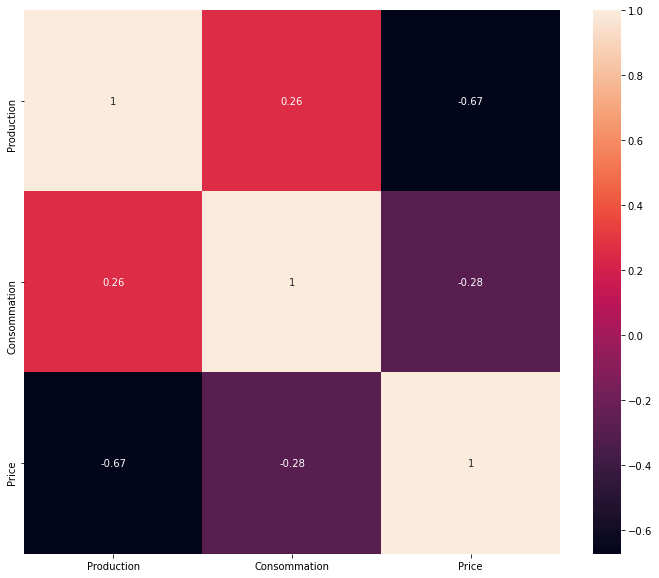

In [92]:
plt.figure(figsize=(12,10))
sns.heatmap(DF.corr(), annot=True)

# Model Creation

In [93]:
def regression_linéaire (x_train, x_test, y_train, y_test):
    regression_model = LinearRegression()
    regression_model.fit(x_train, y_train)
    y_train_predicted  = regression_model.predict(x_train)
    RMSE = (np.sqrt(mean_squared_error(y_train, y_train_predicted)))
    R2 = r2_score(y_train, y_train_predicted)

    print('Slope:' , regression_model.coef_)
    print('Intercept:' , regression_model.intercept_)
    print('Le RMSE pour le modèle apprentissage est {}'.format(RMSE))
    print('Le score R2 pour le modèle apprentissage est {}'.format(R2))
    print('\n')
    
    y_test_predicted = regression_model.predict(x_test)
    RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predicted)))
    R2 = r2_score(y_test, y_test_predicted)
    print('Le RMSE pour le modèle test est {}'.format(RMSE))
    print('Le score R2 pour le modèle test est{}'.format(R2))
    print('\n')
    
    plt.scatter(x_train, y_train, s=10)
    plt.xlabel('x')
    plt.ylabel('y')
    
    
    plt.plot(x_train, y_train_predicted, color='r')
    plt.show()

In [94]:
DF.set_index('Date', inplace=True, drop=False)
DF

,Date,Production,Consommation,Price
Date,,,,
1987-06-01,1987-06-01,266.000,6092.600000,18.65
1987-07-01,1987-07-01,283.000,6462.000000,18.98
1987-09-01,1987-09-01,268.000,5963.500000,18.43
1987-10-01,1987-10-01,269.000,6638.600000,18.50
1987-12-01,1987-12-01,300.000,7695.600000,17.65
...,...,...,...,...
2020-10-01,2020-10-01,48.500,5787.509457,39.75
2020-12-01,2020-12-01,56.585,5388.641332,47.03
2021-02-01,2021-02-01,51.677,4945.952405,56.42


# Data set split between test and test

In [95]:
split_date = pd.datetime(2010, 6, 1)

DF_train = DF.loc[DF.index < split_date]
DF_test = DF.loc[DF.index >= split_date]

<ipython-input-95-ae98ccefa7e7>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2010, 6, 1)


In [96]:
DF_train.head()

,Date,Production,Consommation,Price
Date,,,,
1987-06-01,1987-06-01,266.0,6092.6,18.65
1987-07-01,1987-07-01,283.0,6462.0,18.98
1987-09-01,1987-09-01,268.0,5963.5,18.43
1987-10-01,1987-10-01,269.0,6638.6,18.50
1987-12-01,1987-12-01,300.0,7695.6,17.65


# Predict Oil Price with Oil consumption

Slope: [[-0.00176811]]
Intercept: [45.40407031]
Le RMSE pour le modèle apprentissage est 24.04611004960169
Le score R2 pour le modèle apprentissage est 0.001388397275577713


Le RMSE pour le modèle test est 49.28781634250099
Le score R2 pour le modèle test est-2.0911281089746403




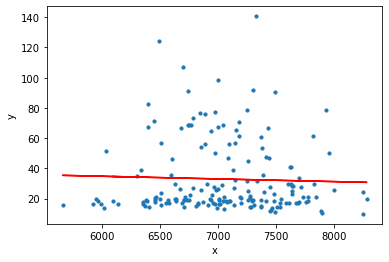

In [97]:
x_train = DF_train[['Consommation']]
x_test = DF_test[['Consommation']]
y_train = DF_train[['Price']]
y_test = DF_test[['Price']]
BTC_DPI = regression_linéaire(x_train, x_test, y_train, y_test)

# Predict Oil Price with Oil Prodution

Slope: [[-0.21650983]]
Intercept: [67.90556718]
Le RMSE pour le modèle apprentissage est 18.31759161947608
Le score R2 pour le modèle apprentissage est 0.4205130076357717


Le RMSE pour le modèle test est 35.67055146535161
Le score R2 pour le modèle test est-0.619039694016688




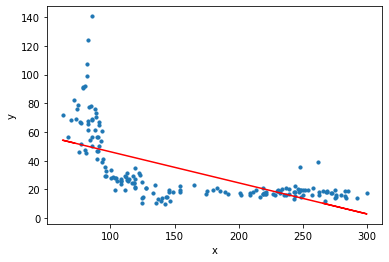

In [98]:
x_train = DF_train[['Production']]
x_test = DF_test[['Production']]
y_train = DF_train[['Price']]
y_test = DF_test[['Price']]
BTC_DPI = regression_linéaire(x_train, x_test, y_train, y_test)

# Predict Oil Price with Oil Production & Consumption

Slope: [[-0.23848825 -0.01121151]]
Intercept: [150.59131682]
Le RMSE pour le modèle apprentissage est 17.48484689181978
Le score R2 pour le modèle apprentissage est 0.47200402186210544


Le RMSE pour le modèle test est 33.74257314632906
Le score R2 pour le modèle test est-0.44875265670852715




ValueError: x and y must be the same size

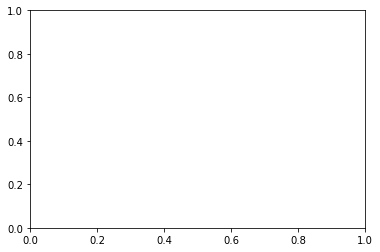

In [100]:
x_train = DF_train[['Production', 'Consommation']]
x_test = DF_test[['Production', 'Consommation']]
y_train = DF_train[['Price']]
y_test = DF_test[['Price']]
BTC_DPI = regression_linéaire(x_train, x_test, y_train, y_test)